# Instantiate a project object for access to files

In [21]:
# The code was removed by Watson Studio for sharing.

# Acces the weather data file

In [42]:
# Fetch the file from the project
weather_csv_file = project.get_file("Wetter-Linz-Hoersching.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
import pandas as pd
weather = pd.read_csv(weather_csv_file, parse_dates=['DateTime [UTC]'])
weather.head()

,DateTime [UTC],T,Td,ff,dd,P,Pstat,rF,rSD,RR
0,2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,NaN,97.0,0.0,0.0
1,2017-01-01 00:00:00,-5.1,-5.5,0.56,NaN,1031.7,NaN,97.0,0.0,0.0
2,2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,NaN,97.0,0.0,0.0
3,2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,NaN,96.0,0.0,0.0
4,2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,NaN,96.0,0.0,0.0


In [43]:
# set the index to 'DateTime [UTC]'
weather = weather.set_index('DateTime [UTC]')
weather.head(10)

,T,Td,ff,dd,P,Pstat,rF,rSD,RR
DateTime [UTC],,,,,,,,,
2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,NaN,97.0,0.0,0.0
2017-01-01 00:00:00,-5.1,-5.5,0.56,NaN,1031.7,NaN,97.0,0.0,0.0
2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,NaN,97.0,0.0,0.0
2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,NaN,96.0,0.0,0.0
2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,NaN,96.0,0.0,0.0
2017-01-01 04:00:00,-6.0,-6.5,0.56,NaN,1029.2,NaN,97.0,0.0,0.0
2017-01-01 05:00:00,-6.3,-6.8,1.11,270.0,1028.9,NaN,96.0,0.0,0.0
2017-01-01 06:00:00,-6.6,-7.2,1.11,225.0,1028.5,NaN,95.0,0.0,0.0
2017-01-01 07:00:00,-6.2,-6.8,1.39,270.0,1028.4,NaN,96.0,0.0,0.0


# Do some visualization

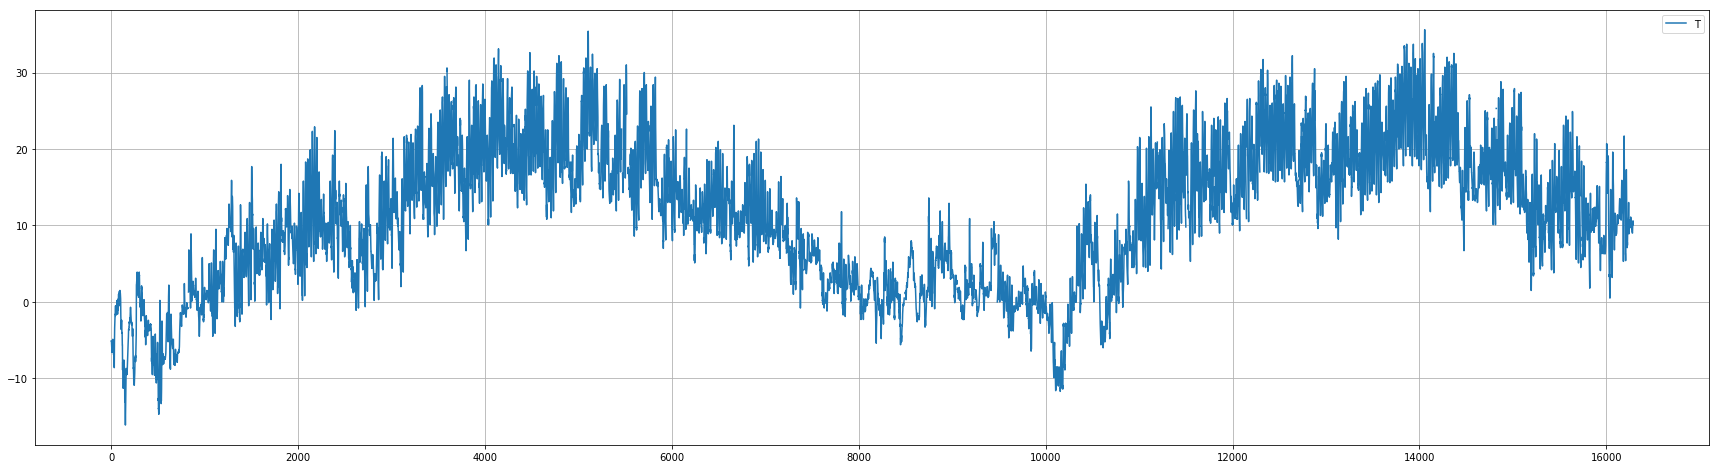

In [19]:
weather[['T']].plot(figsize=(30,8), grid=True);

# Prepair data

In [49]:
weather.shape

(16288, 9)

In [59]:
weather.describe()

,T,Td,ff,dd,P,Pstat,rF,rSD,RR
count,16151.000000,16151.000000,16151.000000,15185.000000,16151.000000,0.0,16151.00000,16004.000000,15722.000000
mean,11.334196,6.098161,3.259360,202.208100,1017.296619,NaN,73.42598,24.572929,0.073642
std,9.196078,7.059229,2.261420,93.536968,7.775018,NaN,17.78894,39.645128,0.481459
min,-16.100000,-18.000000,0.000000,0.000000,986.800000,NaN,16.00000,0.000000,0.000000
25%,4.100000,0.800000,1.388889,90.000000,1012.800000,NaN,61.00000,0.000000,0.000000
50%,11.700000,7.000000,2.500000,225.000000,1017.200000,NaN,78.00000,0.000000,0.000000
75%,18.100000,11.800000,4.722222,270.000000,1022.000000,NaN,88.00000,45.000000,0.000000
max,35.600000,21.700000,23.333333,360.000000,1042.000000,NaN,100.00000,100.000000,19.200000


In [54]:
weather.drop(columns='Pstat').head()

,T,Td,ff,dd,P,rF,rSD,RR
DateTime [UTC],,,,,,,,
2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,97.0,0.0,0.0
2017-01-01 00:00:00,-5.1,-5.5,0.56,NaN,1031.7,97.0,0.0,0.0
2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,97.0,0.0,0.0
2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,96.0,0.0,0.0
2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,96.0,0.0,0.0


In [57]:
train_data = weather.drop(columns='Pstat').dropna()

In [60]:
train_data.describe()

,T,Td,ff,dd,P,rF,rSD,RR
count,14789.000000,14789.000000,14789.000000,14789.000000,14789.000000,14789.000000,14789.000000,14789.000000
mean,11.522733,6.144384,3.412167,202.312868,1017.305105,72.816147,25.156995,0.076361
std,9.262365,7.084319,2.212271,93.458123,7.764344,17.848484,39.925563,0.491036
min,-16.100000,-18.000000,0.000000,0.000000,986.800000,16.000000,0.000000,0.000000
25%,4.300000,0.900000,1.388889,90.000000,1012.800000,60.000000,0.000000,0.000000
50%,11.900000,7.100000,3.055556,225.000000,1017.200000,77.000000,0.000000,0.000000
75%,18.300000,11.800000,4.722222,270.000000,1021.900000,87.000000,50.000000,0.000000
max,35.600000,21.700000,23.333333,360.000000,1042.000000,100.000000,100.000000,19.200000


# Train a linear regression using scikits-learn

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
# instantiate a linear regression learner
lr = LinearRegression()

In [90]:
# extract design data matrix and target vector from the pandas data frame
X = train_data[['T', 'P', 'rF']]
Y = train_data['Td']

In [91]:
# train the model
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# instpect the trained model parameters
lr.coef_, lr.intercept_

(array([ 0.95267614,  0.00237828,  0.2338594 ]), -24.281223677043389)

In [93]:
# apply the model to the data to get the predictions
y_pred = lr.predict(X)
y_pred

array([-3.99970001, -4.09853504, -4.71489187, ...,  6.83934806,
        6.69980496,  6.92456944])

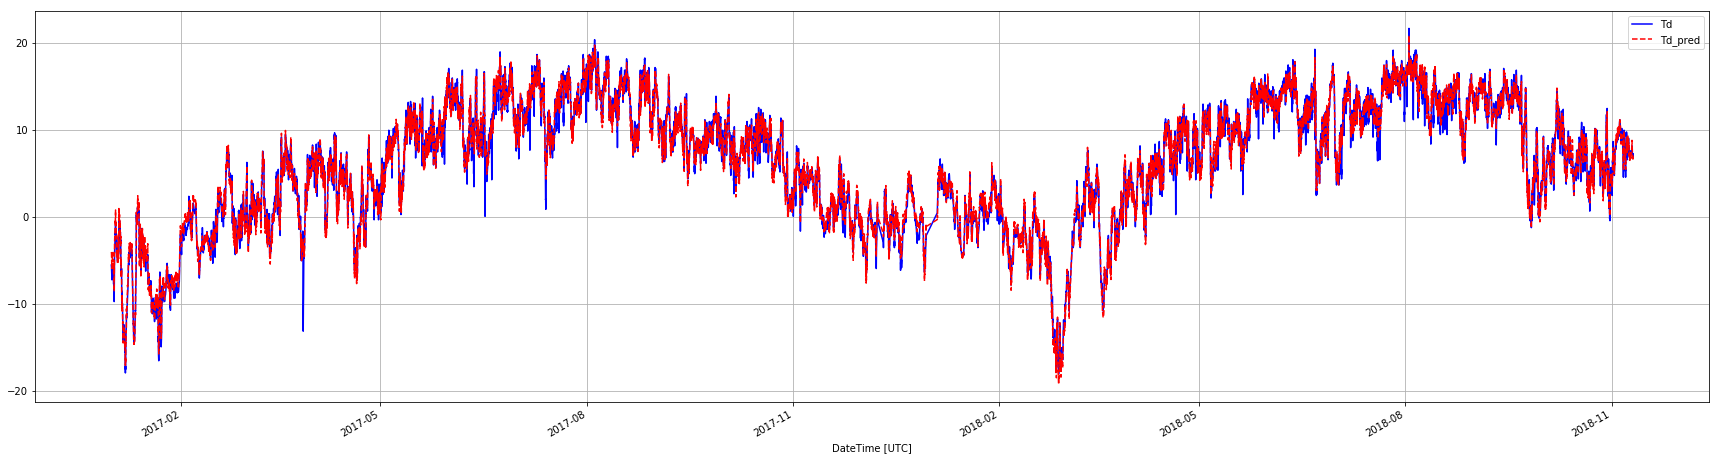

In [94]:
# plot the predictions together with the original values as a time series
train_data['Td_pred'] = y_pred
train_data[['Td', 'Td_pred']].plot(style=['b-','r--'], figsize=(30,8), grid=True);

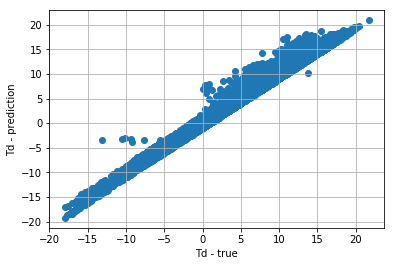

In [97]:
# lets have a look at the scatter plot
from matplotlib import pylab as plt
plt.scatter(Y.values, y_pred);
plt.grid(True);
plt.xlabel('Td - true');
plt.ylabel('Td - prediction');

# Try to evaluate future behaviour

### Training and test set

In [114]:
from sklearn.model_selection import train_test_split
from numpy import sqrt

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)

In [120]:
len(X_train), len(X_test)

(8873, 5916)

In [121]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
lr.coef_, lr.intercept_

(array([ 0.95228959,  0.00163492,  0.23341707]), -23.477706247711659)

In [123]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [124]:
from sklearn.metrics.regression import mean_squared_error, mean_absolute_error, r2_score

In [125]:
rmse_train = sqrt(mean_squared_error(Y_train, y_pred_train))
rmse_test = sqrt(mean_squared_error(Y_test, y_pred_test))
print("RMSE-train={}, RMSE-test={}".format(rmse_train, rmse_test))

RMSE-train=0.8175796091147053, RMSE-test=0.8386839512743623


#### R2 Score
$$
\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$

$$
SS_{tot} = \sum_i (y_i - \bar{y})^2
$$

$$
SS_{res} = \sum_i (y_i - \hat{y}_i)^2
$$

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$



In [130]:
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)
print("R2-train={:.3g}, R2-test={:.3g}".format(r2_train, r2_test))

R2-train=0.987, R2-test=0.986


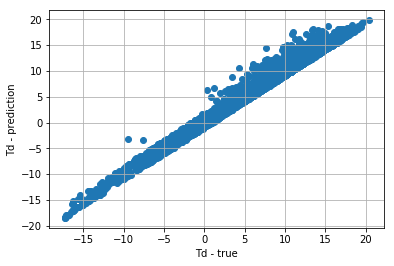

In [129]:
plt.scatter(Y_test.values, y_pred_test);
plt.grid(True);
plt.xlabel('Td - true');
plt.ylabel('Td - prediction');

### Cross validation

In [140]:
from sklearn.model_selection import cross_val_predict

In [139]:
# compute cross validated predictions
y_pred_cv = cross_val_predict(lr, X, Y, cv=3)

In [141]:
r2_cv = r2_score(Y, y_pred_cv)

rmse_cv = sqrt(mean_squared_error(Y, y_pred_cv))

print("RMSE-cv={:.3g}".format(rmse_cv))
print("R2-cv={:.3g}".format(r2_cv))

RMSE-cv=0.892
R2-cv=0.984
